In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
%matplotlib inline

# Western Digital
wd = pdr.get_data_yahoo('WD','2019-05-31')
wd.drop('Adj Close', axis=1, inplace=True)
wd.head()

,High,Low,Open,Close,Volume
Date,,,,,
2019-05-31,50.770000,49.490002,50.029999,50.270000,225700.0
2019-06-03,50.570000,49.509998,50.150002,50.230000,112000.0
2019-06-04,51.590000,50.680000,50.709999,51.590000,99000.0
2019-06-05,52.049999,51.169998,51.770000,51.900002,149800.0
2019-06-06,52.259998,51.520000,51.700001,52.150002,124800.0


In [2]:
wd['3-day'] = wd['Close'].rolling(3).mean()
wd['9-day'] = wd['Close'].rolling(9).mean()
wd['21-day'] = wd['Close'].rolling(21).mean()
wd['Change'] = np.log(wd.Close / wd.Close.shift())
wd.tail()

,High,Low,Open,Close,Volume,3-day,9-day,21-day,Change
Date,,,,,,,,,
2021-05-28,102.190002,100.000000,101.400002,101.540001,84800.0,100.970001,99.555556,102.383333,0.003947
2021-06-01,103.050003,100.010002,102.139999,101.800003,134600.0,101.493334,99.877778,101.952381,0.002557
2021-06-02,102.690002,99.339996,102.690002,99.720001,115900.0,101.020002,99.994445,101.319048,-0.020644
2021-06-03,99.900002,97.260002,99.419998,99.570000,99400.0,100.363335,100.038890,100.646667,-0.001505
2021-06-04,101.470001,99.129997,100.000000,100.910004,109800.0,100.066668,100.275557,100.060000,0.013368


In [3]:
wd.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 508 entries, 2019-05-31 to 2021-06-04
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   High    508 non-null    float64
 1   Low     508 non-null    float64
 2   Open    508 non-null    float64
 3   Close   508 non-null    float64
 4   Volume  508 non-null    float64
 5   3-day   506 non-null    float64
 6   9-day   500 non-null    float64
 7   21-day  488 non-null    float64
 8   Change  507 non-null    float64
dtypes: float64(9)
memory usage: 39.7 KB


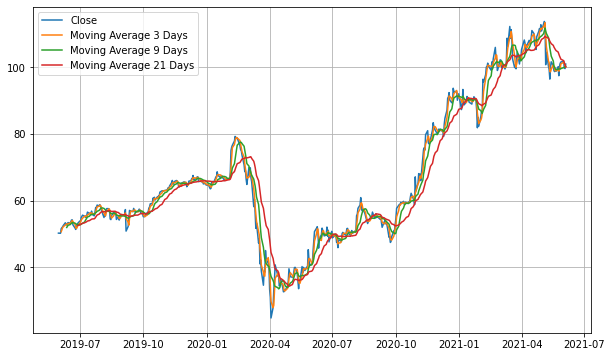

In [4]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(wd['Close'],label='Close')
plt.plot(wd['3-day'],label='Moving Average 3 Days')
plt.plot(wd['9-day'],label='Moving Average 9 Days')
plt.plot(wd['21-day'],label='Moving Average 21 Days')
plt.legend(loc=2)

## Zoom in on the changing period

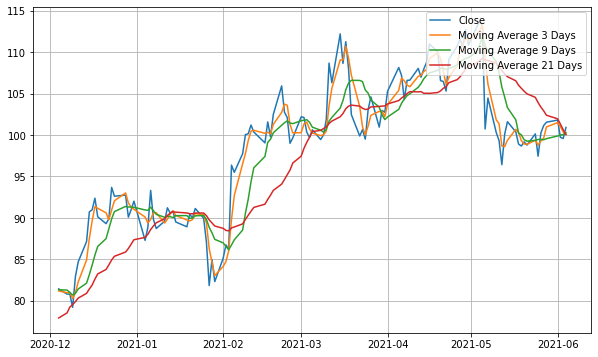

In [5]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(wd['Close'][-125:],label='Close')
plt.plot(wd['3-day'][-125:],label='Moving Average 3 Days')
plt.plot(wd['9-day'][-125:],label='Moving Average 9 Days')
plt.plot(wd['21-day'][-125:],label='Moving Average 21 Days')
plt.legend(loc=1)

## Zoom in from the beginning to -200 days of the DataFrame

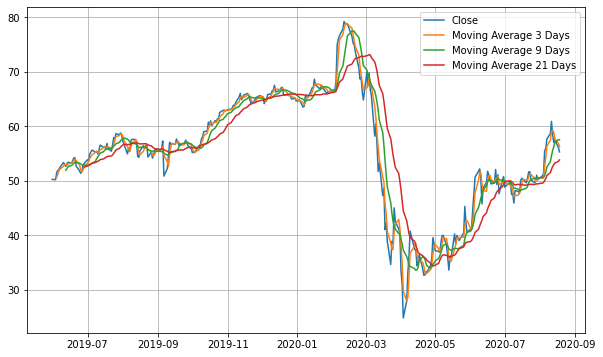

In [6]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(wd['Close'][:-200],label='Close')
plt.plot(wd['3-day'][:-200],label='Moving Average 3 Days')
plt.plot(wd['9-day'][:-200],label='Moving Average 9 Days')
plt.plot(wd['21-day'][:-200:],label='Moving Average 21 Days')
plt.legend(loc=1)

In [7]:
# When the faster moving average is moving above the slower one, indicates time to buy
wd['position-9-21'] = np.where(wd['9-day'] > wd['21-day'], 1,0)
# When the faster moving average is moving below the slower one, indicates time to sell
wd['position-9-21'] = np.where(wd['9-day'] < wd['21-day'],-1,wd['position-9-21'])

<AxesSubplot:xlabel='Date'>

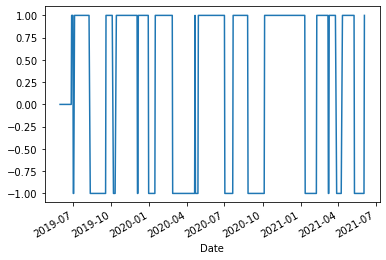

In [8]:
wd['position-9-21'].plot()

<AxesSubplot:xlabel='Date'>

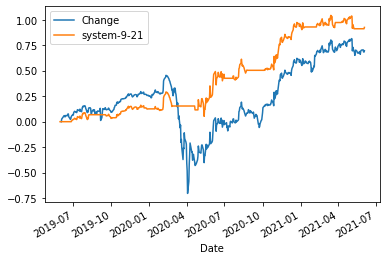

In [9]:
# Whether we are making money with this system
wd['system-9-21'] = np.where(wd['position-9-21'] > 0, wd['position-9-21']* wd['Change'],0)
wd[['Change','system-9-21']].cumsum().plot()

In [10]:
# When the faster moving average is moving above the slower one, indicates time to buy
wd['position-3-9'] = np.where(wd['3-day'] > wd['9-day'], 1,0)
# When the faster moving average is moving below the slower one, indicates time to sell
wd['position-3-9'] = np.where(wd['3-day'] < wd['9-day'],-1,wd['position-3-9'])


<AxesSubplot:xlabel='Date'>

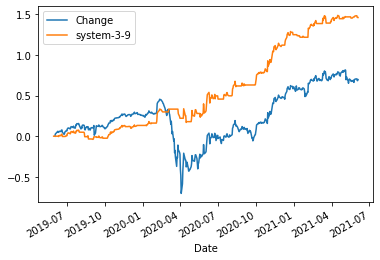

In [11]:
# Whether we are making money with this system
wd['system-3-9'] = np.where(wd['position-3-9'] > 0, wd['position-3-9']* wd['Change'],0)
wd[['Change','system-3-9']].cumsum().plot()

<AxesSubplot:xlabel='Date'>

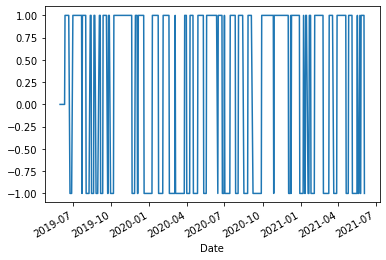

In [12]:
wd['position-3-9'].plot()

In [13]:
wd['position-3-9'].diff()[wd['position-3-9'].diff() != 0].index.values

array(['2019-05-31T00:00:00.000000000', '2019-06-12T00:00:00.000000000',
       '2019-06-24T00:00:00.000000000', '2019-07-01T00:00:00.000000000',
       '2019-07-23T00:00:00.000000000', '2019-07-24T00:00:00.000000000',
       '2019-08-02T00:00:00.000000000', '2019-08-12T00:00:00.000000000',
       '2019-08-15T00:00:00.000000000', '2019-08-21T00:00:00.000000000',
       '2019-08-26T00:00:00.000000000', '2019-09-03T00:00:00.000000000',
       '2019-09-06T00:00:00.000000000', '2019-09-12T00:00:00.000000000',
       '2019-09-23T00:00:00.000000000', '2019-09-25T00:00:00.000000000',
       '2019-09-30T00:00:00.000000000', '2019-10-08T00:00:00.000000000',
       '2019-11-21T00:00:00.000000000', '2019-11-29T00:00:00.000000000',
       '2019-12-04T00:00:00.000000000', '2019-12-06T00:00:00.000000000',
       '2019-12-20T00:00:00.000000000', '2020-01-09T00:00:00.000000000',
       '2020-01-24T00:00:00.000000000', '2020-02-04T00:00:00.000000000',
       '2020-02-19T00:00:00.000000000', '2020-03-04

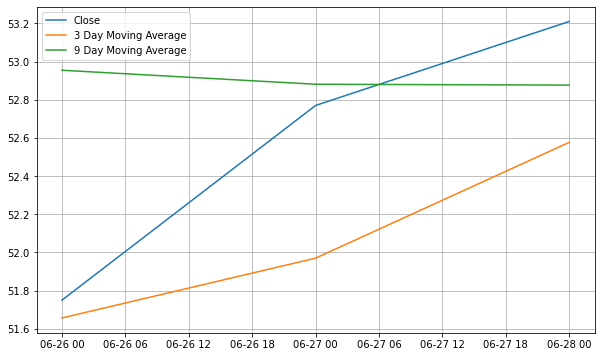

In [14]:
start = '2019-06-26'
finish = '2019-06-28'
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(wd['Close'][start:finish],label='Close')
plt.plot(wd['3-day'][start:finish],label='3 Day Moving Average')
plt.plot(wd['9-day'][start:finish],label='9 Day Moving Average')
plt.legend(loc=2)

## Calculate the Volitility

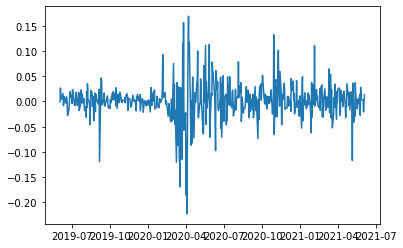

In [15]:
plt.plot(wd.Change)

In [16]:
wd['Volatility'] = wd.Change.rolling(21).std().shift()

<AxesSubplot:xlabel='Date'>

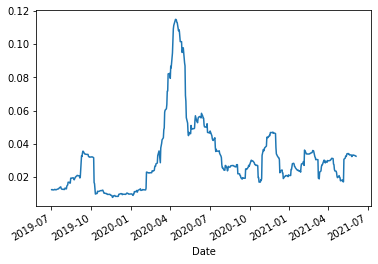

In [17]:
wd.Volatility.plot()

## Prepare data for DGIM processing

In [18]:
bit_depth = 16
num_buckets = 5
wd_list = wd['Close'].tolist()
wd_3day_list = wd['3-day'].tolist()
wd_9day_list = wd['9-day'].tolist()
wd_21day_list = wd['21-day'].tolist()
wd_list_bin = [ np.array(list(np.binary_repr(round(elem)).zfill(bit_depth))).astype(np.int8) for elem in wd_list ]
print(wd_list[0],wd_list_bin[0], len(wd_list_bin))

50.27000045776367 [0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0] 508


In [19]:
from ipynb.fs.full.DGIMMovingAverage import *

## 3, 9, 21 day moving average with DGIM

[0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0]
0 nan 16.666666666666668 nan
1 nan 33.333333333333336 nan
2 50.6966667175293 34.666666666666664 -31.61943592895027
3 51.24000040690104 35.333333333333336 -31.043456181209127
4 51.880001068115234 34.666666666666664 -33.17913270442791
5 52.196667989095054 35.0 -32.945911399340254
6 52.69000116984049 35.333333333333336 -32.941103532261884
7 52.95333353678385 35.333333333333336 -33.27458164878485
8 53.0 35.333333333333336 -33.33333333333333
9 52.93333307902018 35.333333333333336 -33.249369956381045
10 53.096666971842446 35.333333333333336 -33.45470563703958
11 53.28666687011719 35.333333333333336 -33.69198073608909
12 53.46999994913737 36.0 -32.67252658641383
13 53.733333587646484 36.333333333333336 -32.38213431506413
14 54.063334147135414 36.0 -33.41143204001323
15 53.73666763305664 36.333333333333336 -32.386329607490346
16 52.94000116984049 35.666666666666664 -32.62813396576635
17 51.99000040690104 36.0 -30.75591514090191
18 51.65666707356771 35.66666666

328 53.53333409627279 36.333333333333336 -32.129515288562956
329 53.12000020345052 36.0 -32.22891592221503
330 51.769999186197914 36.0 -30.4616562373875
331 50.33333206176758 34.0 -32.450329419327524
332 48.56666564941406 37.333333333333336 -23.129716989777027
333 48.1966667175293 37.333333333333336 -22.539594797838852
334 48.21999994913737 37.333333333333336 -22.577077203001508
335 49.393333435058594 33.333333333333336 -32.51450951946914
336 50.46999994913737 34.0 -32.63324740585595
337 51.710000356038414 35.333333333333336 -31.670212550661294
338 52.96999994913737 36.666666666666664 -30.77842797456187
339 55.15999984741211 39.333333333333336 -28.69228890112352
340 57.00999959309896 40.666666666666664 -28.667484727382195
341 58.37666702270508 39.333333333333336 -32.621481596345696
342 58.68999989827474 39.333333333333336 -32.98120054266761
343 59.006666819254555 40.666666666666664 -31.081233937117318
344 59.096666971842446 40.666666666666664 -31.18619246996967
345 59.483333587646484 4

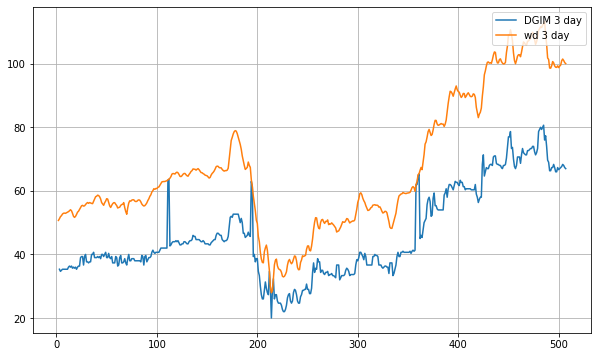

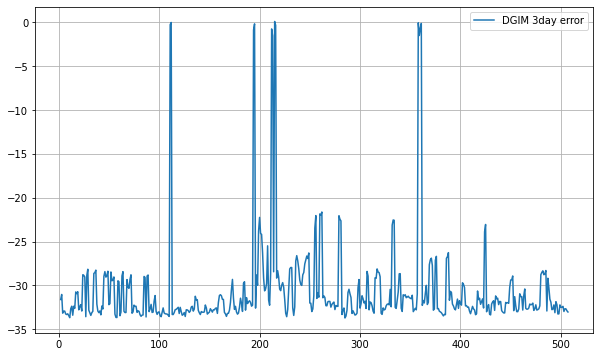

In [20]:
print(wd_list_bin[0])
dgim_3day = DGIMMovingAverage(wd_list_bin, 3, num_buckets, bit_depth, wd_3day_list, False)
wd['3-day-dgim'] = dgim_3day.mov_avg
wd.tail()

plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(range(len(dgim_3day.mov_avg)), dgim_3day.mov_avg, label = "DGIM 3 day")
plt.plot(range(len(dgim_3day.mov_avg)), wd_3day_list, label = "wd 3 day")
plt.legend(loc=1)

plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(range(len(dgim_3day.error)), dgim_3day.error, label = "DGIM 3day error")
plt.legend(loc=1)

0 nan 5.555555555555555 nan
1 nan 11.11111111111111 nan
2 nan 11.555555555555555 nan
3 nan 17.333333333333332 nan
4 nan 22.666666666666668 nan
5 nan 28.555555555555557 nan
6 nan 29.11111111111111 nan
7 nan 34.888888888888886 nan
8 51.964444902208115 40.333333333333336 -22.38282654758146
9 52.28777821858724 40.666666666666664 -22.225292310832035
10 52.64333385891385 41.0 -22.1173945596197
11 52.82777828640408 41.0 -22.389316132660674
12 53.03111139933268 41.22222222222222 -22.26785157902434
13 53.26111136542426 41.44444444444444 -22.18629431125783
14 53.4500003390842 41.44444444444444 -22.461283102857053
15 53.38000022040473 41.44444444444444 -22.359602335478957
16 53.25666724310981 41.333333333333336 -22.388434213031008
17 53.113333808051216 41.111111111111114 -22.59738155453676
18 52.954444885253906 41.0 -22.57496025339854
19 52.881111568874786 41.0 -22.46759044276193
20 52.87666702270508 41.0 -22.46107345912191
21 52.89444478352865 41.0 -22.487134201345437
22 52.83444468180338 41.0 -

192 68.18333350287543 53.22222222222222 -21.94247554649446
193 67.62000020345052 52.666666666666664 -22.11377327978892
194 66.4533339606391 51.22222222222222 -22.920011428528777
195 65.50111134847005 50.22222222222222 -23.326152505967677
196 64.3955561319987 50.22222222222222 -22.009801236476363
197 62.93666754828559 48.888888888888886 -22.320499649300817
198 61.08666737874349 46.888888888888886 -23.24202497711481
199 58.845556047227646 44.666666666666664 -24.09508947316504
200 56.49000040690104 45.888888888888886 -18.766350578246907
201 53.631111568874786 43.0 -19.822657517030898
202 51.02666685316298 40.333333333333336 -20.956362975072118
203 48.88000022040473 38.22222222222222 -21.80396470974947
204 46.015555911593964 35.44444444444444 -22.972908308353286
205 44.06777826944987 33.44444444444444 -24.106806020602328
206 42.60222244262695 33.77777777777778 -20.713578209994058
207 41.692222595214844 32.888888888888886 -21.11505014207697
208 41.165555742051865 32.44444444444444 -21.18545

442 101.84111192491319 79.11111111111111 -22.319081542001197
443 101.53222232394748 79.11111111111111 -22.08275432138168
444 100.94444444444444 78.44444444444444 -22.28948816730875
445 100.57777743869357 78.0 -22.44807751141219
446 100.34444427490234 77.77777777777777 -22.48920372243153
447 100.66333346896701 78.22222222222223 -22.293232772450395
448 101.66444396972656 79.11111111111111 -22.184091092192798
449 102.12111070421007 79.55555555555556 -22.09685636304406
450 103.23999955919054 81.11111111111111 -21.434413543746945
451 104.15999942355685 81.22222222222223 -22.021675622385814
452 105.4433330959744 82.44444444444444 -21.81161006224679
453 106.25777774386935 83.22222222222223 -21.678935896037203
454 106.59222242567274 83.11111111111111 -22.02891616312355
455 106.57888878716363 83.11111111111111 -22.01916152730519
456 106.4433330959744 83.0 -22.02423807495465
457 105.42444441053603 82.0 -22.219177479672833
458 105.05777740478516 81.66666666666667 -22.264996762679534
459 104.21444

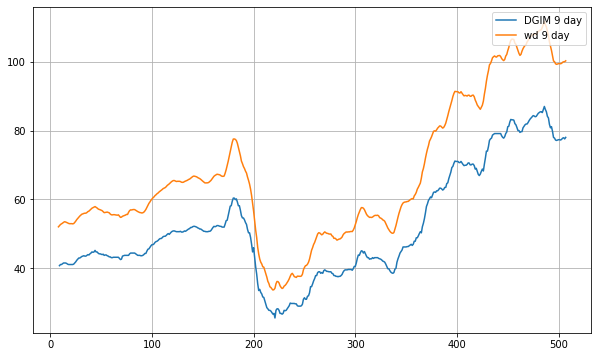

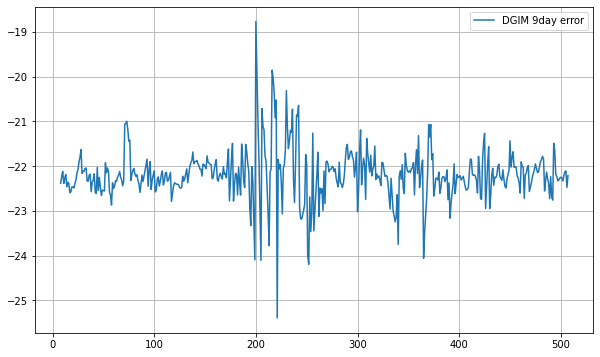

In [21]:
dgim_9day = DGIMMovingAverage(wd_list_bin, 9, num_buckets, bit_depth, wd_9day_list, False)
wd['9-day-dgim'] = dgim_9day.mov_avg
wd.tail()

plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(range(len(dgim_9day.mov_avg)), dgim_9day.mov_avg, label = "DGIM 9 day")
plt.plot(range(len(dgim_9day.mov_avg)), wd_9day_list, label = "wd 9 day")
plt.legend(loc=1)

plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(range(len(dgim_9day.error)), dgim_9day.error, label = "DGIM 9day error")
plt.legend(loc=1)

0 nan 2.380952380952381 nan
1 nan 4.761904761904762 nan
2 nan 4.9523809523809526 nan
3 nan 7.428571428571429 nan
4 nan 9.714285714285714 nan
5 nan 12.238095238095237 nan
6 nan 12.476190476190476 nan
7 nan 14.952380952380953 nan
8 nan 17.285714285714285 nan
9 nan 19.80952380952381 nan
10 nan 22.333333333333332 nan
11 nan 24.80952380952381 nan
12 nan 27.285714285714285 nan
13 nan 29.857142857142858 nan
14 nan 27.857142857142858 nan
15 nan 30.38095238095238 nan
16 nan 32.476190476190474 nan
17 nan 34.904761904761905 nan
18 nan 37.38095238095238 nan
19 nan 39.904761904761905 nan
20 52.5442860921224 42.42857142857143 -19.251788188378388
21 52.716666993640715 42.61904761904762 -19.15451023451688
22 52.88095274425688 42.80952380952381 -19.04547556743269
23 53.041428883870445 42.857142857142854 -19.200625324451934
24 53.22047642299107 43.04761904761905 -19.114555259744684
25 53.36809539794922 43.19047619047619 -19.070606008293346
26 53.50476201375326 43.285714285714285 -19.099323767503524
27 5

154 65.72571400233677 53.42857142857143 -18.709789251324278
155 65.66380909511021 53.333333333333336 -18.77819141426428
156 65.65476172310966 53.285714285714285 -18.839528333923756
157 65.63190442039853 53.23809523809524 -18.883817697740408
158 65.66952351161412 53.285714285714285 -18.857772317640872
159 65.76999973115467 53.38095238095238 -18.83692777990648
160 65.81285658336822 53.42857142857143 -18.817425344710625
161 65.7985710870652 53.42857142857143 -18.79979983474973
162 65.81761877877372 53.285714285714285 -19.040349264505743
163 65.896666208903 53.333333333333336 -19.06520253352709
164 65.94476154872349 53.38095238095238 -19.0520200129745
165 65.96142814272926 53.38095238095238 -19.072473286289195
166 65.99904723394485 53.38095238095238 -19.118601528087957
167 66.05571401686896 53.42857142857143 -19.11589750596425
168 66.12047595069522 53.523809523809526 -19.051082506240263
169 66.20095225742885 53.57142857142857 -19.07755591927009
170 66.29571442377 53.666666666666664 -19.049

295 49.50999959309896 40.0 -19.208240095450392
296 49.597618466331845 40.095238095238095 -19.158944854467585
297 49.66999944051107 40.142857142857146 -19.18087860875542
298 50.05047571091425 40.523809523809526 -19.0341171623016
299 50.443332853771395 40.523809523809526 -19.664686627105443
300 51.0042853582473 41.285714285714285 -19.054420632052913
301 51.5019044421968 41.61904761904762 -19.189303638744494
302 52.11476153419132 42.04761904761905 -19.317257126788235
303 52.63142830984933 42.523809523809526 -19.204530659009855
304 52.95952351888021 42.476190476190474 -19.794991242608898
305 53.29285685221354 42.857142857142854 -19.581825053984197
306 53.576190221877326 43.333333333333336 -19.118300211576855
307 53.8466664268857 43.57142857142857 -19.082402936510647
308 54.03904742286319 43.76190476190476 -19.017993749109486
309 54.14285696120489 43.666666666666664 -19.34916419731001
310 54.21238090878441 43.714285714285715 -19.364755833473488
311 54.427142915271574 43.95238095238095 -19.2

440 97.44381023588635 77.76190476190476 -20.198210051861444
441 98.38666752406529 78.33333333333333 -20.382166298931644
442 99.11190541585286 79.80952380952381 -19.475341055487014
443 99.72857193719773 80.42857142857143 -19.352528702386437
444 100.41333371117001 81.14285714285714 -19.191153063140675
445 100.56000010172527 81.28571428571429 -19.166950871632203
446 100.77428581601097 81.47619047619048 -19.14982099208727
447 100.97047642299107 81.66666666666667 -19.118271439520417
448 101.38095238095238 82.04761904761905 -19.069985908877403
449 101.67428588867188 81.95238095238095 -19.397141336094947
450 102.19761948358445 82.52380952380952 -19.250751689901197
451 102.59142884753999 82.9047619047619 -19.189387616419918
452 103.17238108317058 83.47619047619048 -19.090565130121757
453 103.47619047619048 83.76190476190476 -19.05200184077313
454 103.60380953834171 83.85714285714286 -19.059788215500898
455 103.47999972388858 83.76190476190476 -19.05498165306997
456 103.22904750279018 83.523809

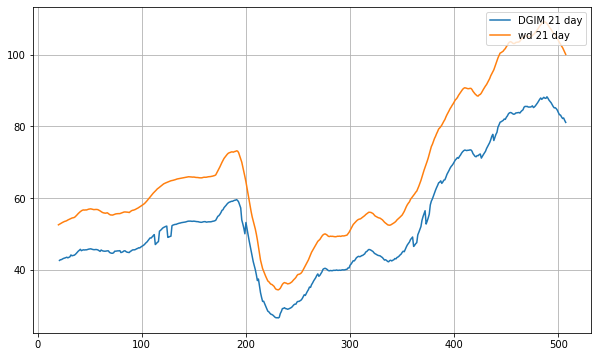

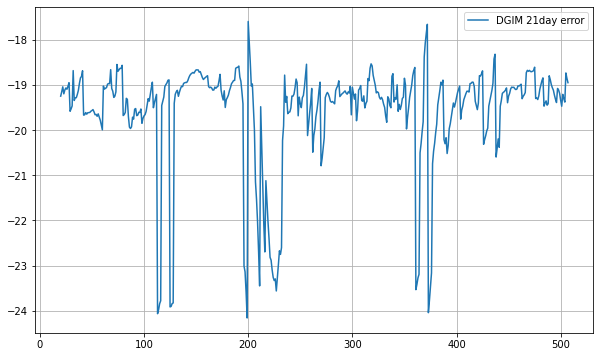

In [22]:
dgim_21day = DGIMMovingAverage(wd_list_bin, 21, num_buckets, bit_depth, wd_21day_list, False)
wd['21-day-dgim'] = dgim_21day.mov_avg
wd.tail()

plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(range(len(dgim_21day.mov_avg)), dgim_21day.mov_avg, label = "DGIM 21 day")
plt.plot(range(len(dgim_21day.mov_avg)), wd_21day_list, label = "wd 21 day")
plt.legend(loc=1)

plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(range(len(dgim_21day.mov_avg)), dgim_21day.error, label = "DGIM 21day error")
plt.legend(loc=1)

In [23]:
wd.tail()

,High,Low,Open,Close,Volume,3-day,9-day,21-day,Change,position-9-21,system-9-21,position-3-9,system-3-9,Volatility,3-day-dgim,9-day-dgim,21-day-dgim
Date,,,,,,,,,,,,,,,,,
2021-05-28,102.190002,100.000000,101.400002,101.540001,84800.0,100.970001,99.555556,102.383333,0.003947,-1,0.000000,1,0.003947,0.033260,67.666667,77.444444,82.619048
2021-06-01,103.050003,100.010002,102.139999,101.800003,134600.0,101.493334,99.877778,101.952381,0.002557,-1,0.000000,1,0.002557,0.032919,68.333333,77.777778,82.190476
2021-06-02,102.690002,99.339996,102.690002,99.720001,115900.0,101.020002,99.994445,101.319048,-0.020644,-1,0.000000,1,-0.020644,0.032846,68.000000,77.888889,82.333333
2021-06-03,99.900002,97.260002,99.419998,99.570000,99400.0,100.363335,100.038890,100.646667,-0.001505,-1,0.000000,1,-0.001505,0.032578,67.333333,77.555556,81.666667
2021-06-04,101.470001,99.129997,100.000000,100.910004,109800.0,100.066668,100.275557,100.060000,0.013368,1,0.013368,-1,0.000000,0.032482,67.000000,78.000000,81.095238


## 9/21 DGIM Comparison

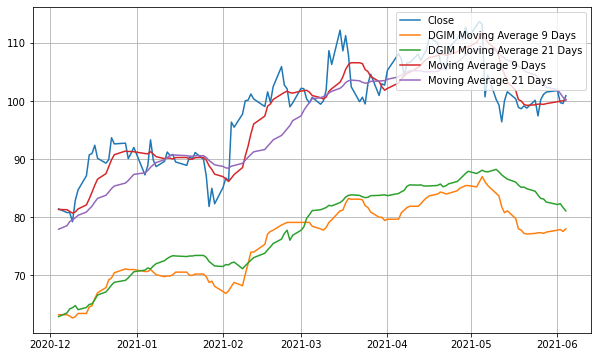

In [24]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(wd['Close'][-125:],label='Close')
plt.plot(wd['9-day-dgim'][-125:],label='DGIM Moving Average 9 Days')
plt.plot(wd['21-day-dgim'][-125:],label='DGIM Moving Average 21 Days')
plt.plot(wd['9-day'][-125:],label='Moving Average 9 Days')
plt.plot(wd['21-day'][-125:],label='Moving Average 21 Days')
plt.legend(loc=1)

<AxesSubplot:xlabel='Date'>

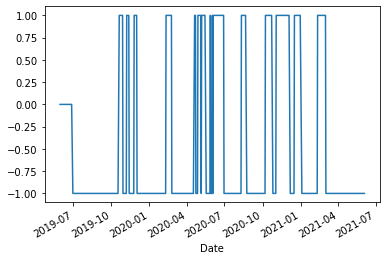

In [25]:
# When the faster moving average is moving above the slower one, indicates time to buy
wd['position-dgim-9-21'] = np.where(wd['9-day-dgim'] > wd['21-day-dgim'], 1,0)
# When the faster moving average is moving below the slower one, indicates time to sell
wd['position-dgim-9-21'] = np.where(wd['9-day-dgim'] < wd['21-day-dgim'],-1,wd['position-dgim-9-21'])
wd['position-dgim-9-21'].plot()

,Change,system-dgim-9-21
Date,,
2021-05-28,0.703044,0.124582
2021-06-01,0.705602,0.124582
2021-06-02,0.684958,0.124582
2021-06-03,0.683452,0.124582
2021-06-04,0.696821,0.124582


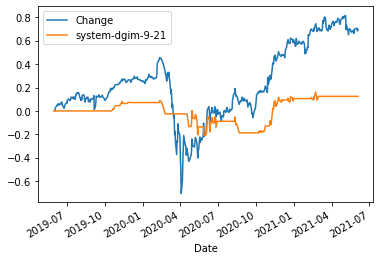

In [26]:
# Whether we are making money with this system
wd['system-dgim-9-21'] = np.where(wd['position-dgim-9-21'] > 0, wd['position-dgim-9-21']* wd['Change'],0)
wd[['Change','system-dgim-9-21']].cumsum().plot()
wd[['Change','system-dgim-9-21']].cumsum().tail()

,system-9-21,system-dgim-9-21
Date,,
2021-05-28,0.912608,0.124582
2021-06-01,0.912608,0.124582
2021-06-02,0.912608,0.124582
2021-06-03,0.912608,0.124582
2021-06-04,0.925976,0.124582


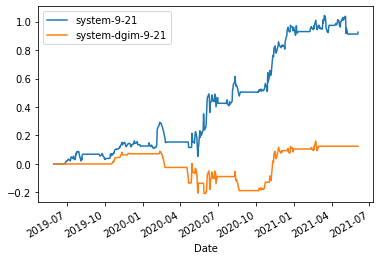

In [27]:
wd[['system-9-21','system-dgim-9-21']].cumsum().plot()
wd[['system-9-21','system-dgim-9-21']].cumsum().tail()

## 3/9 DGIM comparison

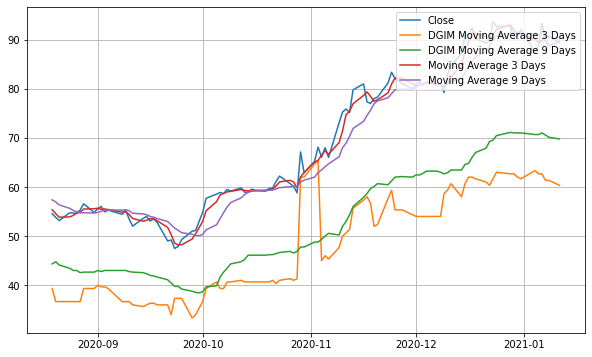

In [28]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(wd['Close'][-200:-100],label='Close')
plt.plot(wd['3-day-dgim'][-200:-100],label='DGIM Moving Average 3 Days')
plt.plot(wd['9-day-dgim'][-200:-100],label='DGIM Moving Average 9 Days')
plt.plot(wd['3-day'][-200:-100],label='Moving Average 3 Days')
plt.plot(wd['9-day'][-200:-100],label='Moving Average 9 Days')
plt.legend(loc=1)

<AxesSubplot:xlabel='Date'>

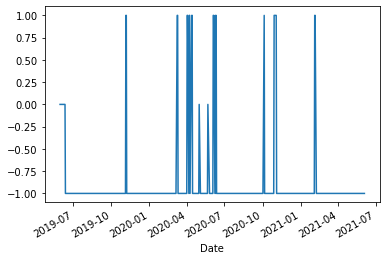

In [29]:
# When the faster moving average is moving above the slower one, indicates time to buy
wd['position-dgim-3-9'] = np.where(wd['3-day-dgim'] > wd['9-day-dgim'], 1,0)
# When the faster moving average is moving below the slower one, indicates time to sell
wd['position-dgim-3-9'] = np.where(wd['3-day-dgim'] < wd['9-day-dgim'],-1,wd['position-dgim-3-9'])
wd['position-dgim-3-9'].plot()

,Change,system-dgim-3-9
Date,,
2021-05-28,0.703044,0.09277
2021-06-01,0.705602,0.09277
2021-06-02,0.684958,0.09277
2021-06-03,0.683452,0.09277
2021-06-04,0.696821,0.09277


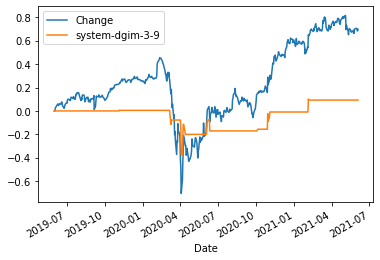

In [30]:
# Whether we are making money with this system
wd['system-dgim-3-9'] = np.where(wd['position-dgim-3-9'] > 0, wd['position-dgim-3-9']* wd['Change'],0)
wd[['Change','system-dgim-3-9']].cumsum().plot()
wd[['Change','system-dgim-3-9']].cumsum().tail()

,system-3-9,system-dgim-3-9
Date,,
2021-05-28,1.480178,0.09277
2021-06-01,1.482735,0.09277
2021-06-02,1.462091,0.09277
2021-06-03,1.460586,0.09277
2021-06-04,1.460586,0.09277


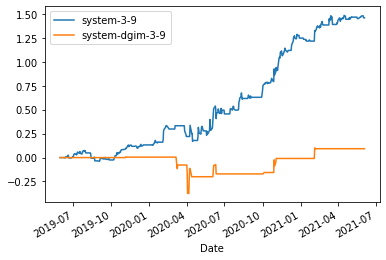

In [31]:
wd[['system-3-9','system-dgim-3-9']].cumsum().plot()
wd[['system-3-9','system-dgim-3-9']].cumsum().tail()

## Pandas 9/21 vs DGIM 3/9

,system-9-21,system-dgim-3-9
Date,,
2021-05-28,0.912608,0.09277
2021-06-01,0.912608,0.09277
2021-06-02,0.912608,0.09277
2021-06-03,0.912608,0.09277
2021-06-04,0.925976,0.09277


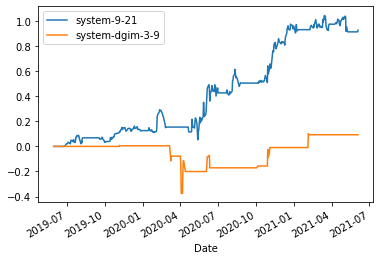

In [32]:
wd[['system-9-21','system-dgim-3-9']].cumsum().plot()
wd[['system-9-21','system-dgim-3-9']].cumsum().tail()

## Normalizing DGIM

<AxesSubplot:xlabel='Date'>

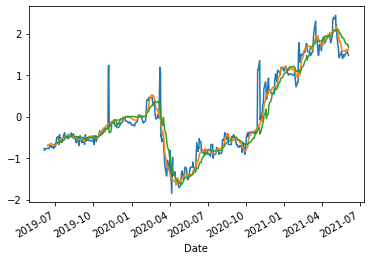

In [33]:
from sklearn import preprocessing

df3 = wd['3-day-dgim']
df9 = wd['9-day-dgim']
df21 = wd['21-day-dgim']

wd['3-day-dgim-norm']=(df3-df3.mean())/df3.std()
wd['9-day-dgim-norm']=(df9-df9.mean())/df9.std()
wd['21-day-dgim-norm']=(df21-df21.mean())/df21.std()

wd['3-day-dgim-norm'].plot()
wd['9-day-dgim-norm'].plot()
wd['21-day-dgim-norm'].plot()

<AxesSubplot:xlabel='Date'>

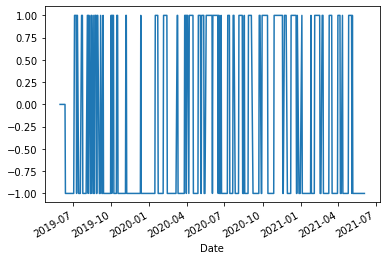

In [34]:
# When the faster moving average is moving above the slower one, indicates time to buy
wd['position-dgim-3-9-norm'] = np.where(wd['3-day-dgim-norm'] > wd['9-day-dgim-norm'], 1,0)
# When the faster moving average is moving below the slower one, indicates time to sell
wd['position-dgim-3-9-norm'] = np.where(wd['3-day-dgim-norm'] < wd['9-day-dgim-norm'],-1,wd['position-dgim-3-9-norm'])
wd['position-dgim-3-9-norm'].plot()

,Change,system-dgim-3-9-norm
Date,,
2021-05-28,0.703044,0.732986
2021-06-01,0.705602,0.732986
2021-06-02,0.684958,0.732986
2021-06-03,0.683452,0.732986
2021-06-04,0.696821,0.732986


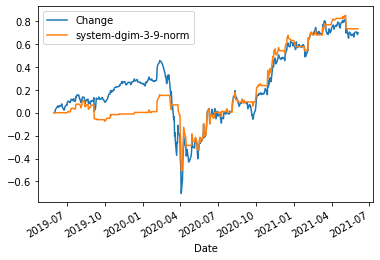

In [35]:
# Whether we are making money with this system
wd['system-dgim-3-9-norm'] = np.where(wd['position-dgim-3-9-norm'] > 0, wd['position-dgim-3-9-norm']* wd['Change'],0)
wd[['Change','system-dgim-3-9-norm']].cumsum().plot()
wd[['Change','system-dgim-3-9-norm']].cumsum().tail()

,system-dgim-3-9-norm,system-dgim-3-9
Date,,
2021-05-28,0.732986,0.09277
2021-06-01,0.732986,0.09277
2021-06-02,0.732986,0.09277
2021-06-03,0.732986,0.09277
2021-06-04,0.732986,0.09277


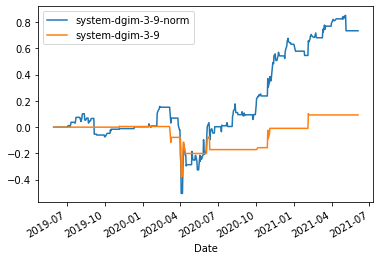

In [36]:
wd[['system-dgim-3-9-norm','system-dgim-3-9']].cumsum().plot()
wd[['system-dgim-3-9-norm','system-dgim-3-9']].cumsum().tail()

,system-dgim-3-9-norm,system-3-9
Date,,
2021-05-28,0.732986,1.480178
2021-06-01,0.732986,1.482735
2021-06-02,0.732986,1.462091
2021-06-03,0.732986,1.460586
2021-06-04,0.732986,1.460586


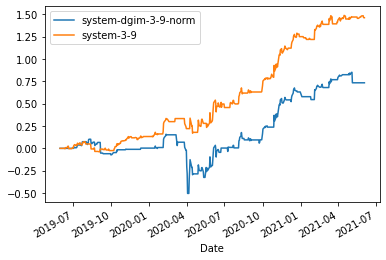

In [37]:
wd[['system-dgim-3-9-norm','system-3-9']].cumsum().plot()
wd[['system-dgim-3-9-norm','system-3-9']].cumsum().tail()

<AxesSubplot:xlabel='Date'>

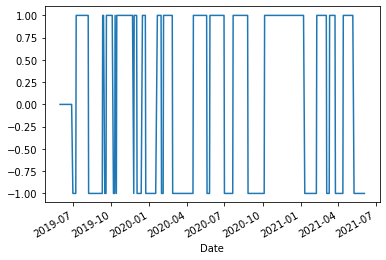

In [38]:
# When the faster moving average is moving above the slower one, indicates time to buy
wd['position-dgim-9-21-norm'] = np.where(wd['9-day-dgim-norm'] > wd['21-day-dgim-norm'], 1,0)
# When the faster moving average is moving below the slower one, indicates time to sell
wd['position-dgim-9-21-norm'] = np.where(wd['9-day-dgim-norm'] < wd['21-day-dgim-norm'],-1,wd['position-dgim-9-21-norm'])
wd['position-dgim-9-21-norm'].plot()

,Change,system-dgim-9-21-norm
Date,,
2021-05-28,0.703044,0.873763
2021-06-01,0.705602,0.873763
2021-06-02,0.684958,0.873763
2021-06-03,0.683452,0.873763
2021-06-04,0.696821,0.873763


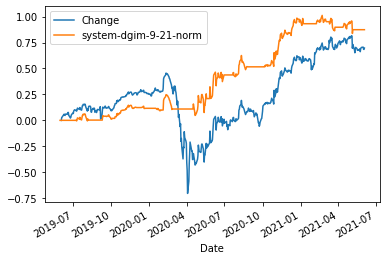

In [39]:
# Whether we are making money with this system
wd['system-dgim-9-21-norm'] = np.where(wd['position-dgim-9-21-norm'] > 0, wd['position-dgim-9-21-norm']* wd['Change'],0)
wd[['Change','system-dgim-9-21-norm']].cumsum().plot()
wd[['Change','system-dgim-9-21-norm']].cumsum().tail()

,system-dgim-9-21-norm,system-dgim-9-21
Date,,
2021-05-28,0.873763,0.124582
2021-06-01,0.873763,0.124582
2021-06-02,0.873763,0.124582
2021-06-03,0.873763,0.124582
2021-06-04,0.873763,0.124582


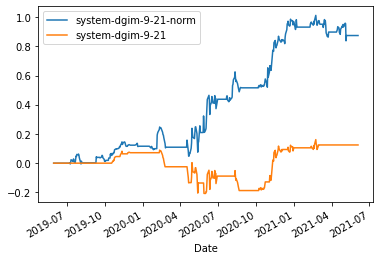

In [40]:
wd[['system-dgim-9-21-norm','system-dgim-9-21']].cumsum().plot()
wd[['system-dgim-9-21-norm','system-dgim-9-21']].cumsum().tail()

,system-dgim-9-21-norm,system-9-21
Date,,
2021-05-28,0.873763,0.912608
2021-06-01,0.873763,0.912608
2021-06-02,0.873763,0.912608
2021-06-03,0.873763,0.912608
2021-06-04,0.873763,0.925976


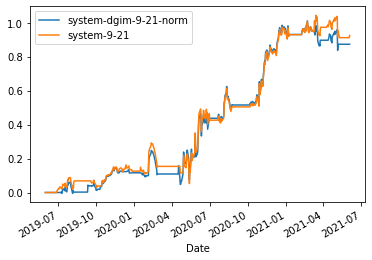

In [41]:
wd[['system-dgim-9-21-norm','system-9-21']].cumsum().plot()
wd[['system-dgim-9-21-norm','system-9-21']].cumsum().tail()

,system-dgim-3-9-norm,system-dgim-9-21-norm
Date,,
2021-05-28,0.732986,0.873763
2021-06-01,0.732986,0.873763
2021-06-02,0.732986,0.873763
2021-06-03,0.732986,0.873763
2021-06-04,0.732986,0.873763


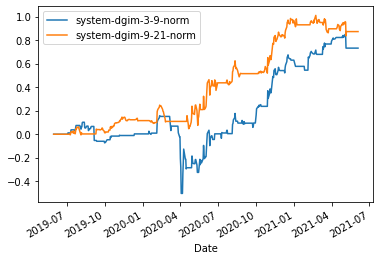

In [42]:
wd[['system-dgim-3-9-norm','system-dgim-9-21-norm']].cumsum().plot()
wd[['system-dgim-3-9-norm','system-dgim-9-21-norm']].cumsum().tail()

## Winning Method: 3-9 Moving Average
### Runner Up: 9-21 Moving Average

,Change,system-dgim-3-9-norm,system-3-9,system-dgim-9-21-norm,system-9-21
Date,,,,,
2021-05-28,0.703044,0.732986,1.480178,0.873763,0.912608
2021-06-01,0.705602,0.732986,1.482735,0.873763,0.912608
2021-06-02,0.684958,0.732986,1.462091,0.873763,0.912608
2021-06-03,0.683452,0.732986,1.460586,0.873763,0.912608
2021-06-04,0.696821,0.732986,1.460586,0.873763,0.925976


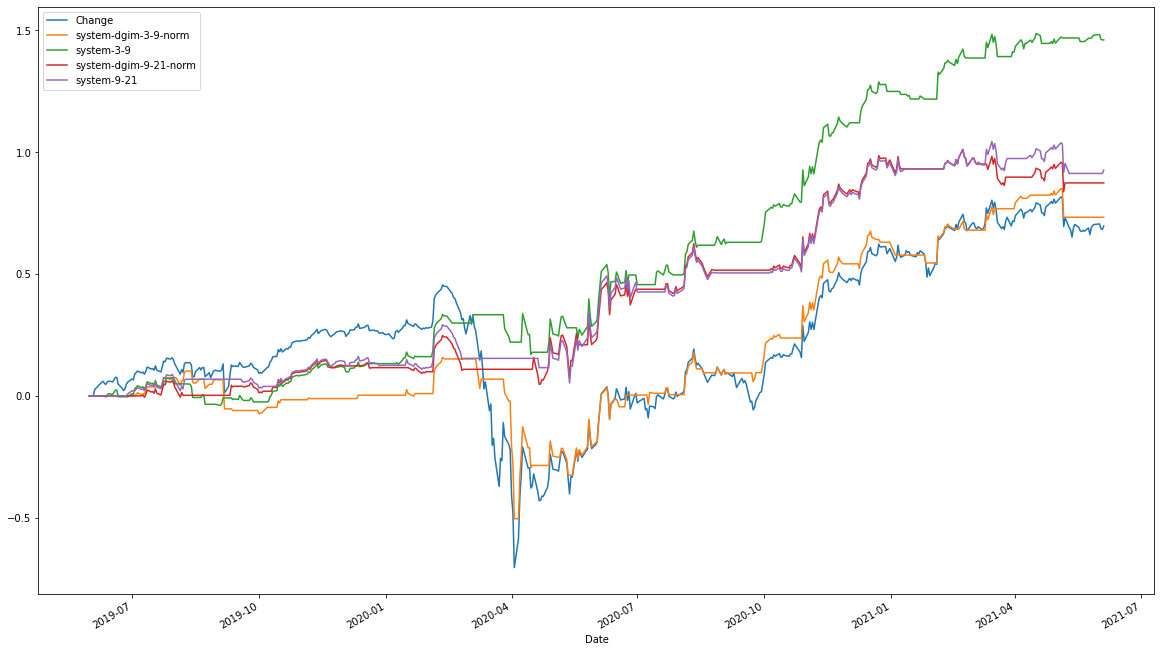

In [43]:
wd[['Change','system-dgim-3-9-norm','system-3-9','system-dgim-9-21-norm','system-9-21']].cumsum().plot(figsize=(20,12))
wd[['Change','system-dgim-3-9-norm','system-3-9','system-dgim-9-21-norm','system-9-21']].cumsum().tail()